In [74]:
#reading dataset
import pandas as pd
import numpy as np 
%cd C:\Users\Sruthi Ashraf\Downloads\AED50_Challenge_Data_23Nov\AED50_Challenge_Data\Competition_Data\Lidar\collection_one
lidar1=pd.read_csv('collection_one.csv')
lidar1["collection"]=1
#lidar2=pd.read_csv('collection_two.csv')
#lidar2["collection"]=2
#lidar3=pd.read_csv('collection_three.csv')
#lidar3["collection"]=3
#lidar = pd.concat([lidar1, lidar2, lidar3], axis=0)
print(lidar1.shape)
#print(lidar2.shape)
#print(lidar3.shape)
#print(lidar.shape)

C:\Users\Sruthi Ashraf\Downloads\AED50_Challenge_Data_23Nov\AED50_Challenge_Data\Competition_Data\Lidar\collection_one
(41130, 14)


In [75]:
#taking a copy of the dataset to perform appropriate modification
df=lidar1.copy()
df.columns = df.columns.str.lower()
df.head()

,timestamp,id,label,confidence,bbox_position_x,bbox_position_y,bbox_size_x,bbox_size_y,bbox_size_z,bbox_yaw,velocity_x,velocity_y,tracking_status,collection
0,1633705176084,351284,1,0.663271,3.119813,11.643920,4.820237,2.509954,0.982162,1.068359,5.313779,9.383846e+00,3,1
1,1633705176084,351314,4,0.280000,-2.546913,-9.031250,0.700000,0.700000,1.674027,3.620596,-0.000767,1.420000e-12,1,1
2,1633705176084,351305,2,0.557778,17.113178,-12.025629,0.117142,0.482906,1.469934,4.994645,0.296628,-1.022861e+00,4,1
3,1633705176084,351304,2,0.498057,-14.341146,10.672971,0.139692,0.358661,1.636156,3.617036,-1.280785,-6.593904e-01,4,1
4,1633705176187,351284,1,0.633271,3.716784,12.510355,4.720977,2.438679,1.003231,1.099034,5.062372,8.908297e+00,3,1


In [76]:
df.groupby("label")["id"].nunique()

label
0      18
1     342
2     286
3      56
4    2072
Name: id, dtype: int64

In [77]:
# getting the datatype info of each column.Looks like we need to change the datatype for timestamp
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41130 entries, 0 to 41129
Data columns (total 14 columns):
timestamp          41130 non-null int64
id                 41130 non-null int64
label              41130 non-null int64
confidence         41130 non-null float64
bbox_position_x    41130 non-null float64
bbox_position_y    41130 non-null float64
bbox_size_x        41130 non-null float64
bbox_size_y        41130 non-null float64
bbox_size_z        41130 non-null float64
bbox_yaw           41130 non-null float64
velocity_x         41130 non-null float64
velocity_y         41130 non-null float64
tracking_status    41130 non-null int64
collection         41130 non-null int64
dtypes: float64(9), int64(5)
memory usage: 4.4 MB


In [78]:
import datetime
d=1633705230077
x=datetime.datetime.fromtimestamp(int(d/1000))
x=x.strftime("%Y-%m-%d %H:%M:%S")
x

'2021-10-08 08:00:30'

In [79]:
type(x)

str

In [80]:
#converting unix timestamp to datetime format
df['timestamp']=pd.to_datetime(df['timestamp'], unit='ms')

In [81]:
#checking whether the datetime conversion took place
df['velocity'] = np.sqrt((df['velocity_x']**2)+(df['velocity_y']**2))
df.head()

,timestamp,id,label,confidence,bbox_position_x,bbox_position_y,bbox_size_x,bbox_size_y,bbox_size_z,bbox_yaw,velocity_x,velocity_y,tracking_status,collection,velocity
0,2021-10-08 14:59:36.084,351284,1,0.663271,3.119813,11.643920,4.820237,2.509954,0.982162,1.068359,5.313779,9.383846e+00,3,1,10.783915
1,2021-10-08 14:59:36.084,351314,4,0.280000,-2.546913,-9.031250,0.700000,0.700000,1.674027,3.620596,-0.000767,1.420000e-12,1,1,0.000767
2,2021-10-08 14:59:36.084,351305,2,0.557778,17.113178,-12.025629,0.117142,0.482906,1.469934,4.994645,0.296628,-1.022861e+00,4,1,1.065003
3,2021-10-08 14:59:36.084,351304,2,0.498057,-14.341146,10.672971,0.139692,0.358661,1.636156,3.617036,-1.280785,-6.593904e-01,4,1,1.440557
4,2021-10-08 14:59:36.187,351284,1,0.633271,3.716784,12.510355,4.720977,2.438679,1.003231,1.099034,5.062372,8.908297e+00,3,1,10.246236


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41130 entries, 0 to 41129
Data columns (total 15 columns):
timestamp          41130 non-null datetime64[ns]
id                 41130 non-null int64
label              41130 non-null int64
confidence         41130 non-null float64
bbox_position_x    41130 non-null float64
bbox_position_y    41130 non-null float64
bbox_size_x        41130 non-null float64
bbox_size_y        41130 non-null float64
bbox_size_z        41130 non-null float64
bbox_yaw           41130 non-null float64
velocity_x         41130 non-null float64
velocity_y         41130 non-null float64
tracking_status    41130 non-null int64
collection         41130 non-null int64
velocity           41130 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(4)
memory usage: 4.7 MB


In [83]:
#None (0), Car (1), Pedestrian (2), Cyclist (3), Misc (4)
#looking for cars with more than 75% confidence
dfcar = df[(df['confidence'] > 0.75) & (df['label'] == 1)]
dfcar

,timestamp,id,label,confidence,bbox_position_x,bbox_position_y,bbox_size_x,bbox_size_y,bbox_size_z,bbox_yaw,velocity_x,velocity_y,tracking_status,collection,velocity
89,2021-10-08 14:59:38.911,351315,1,0.810014,-10.844738,12.772662,5.085938,2.007562,1.199543,5.349103,1.602814,-2.106602e+00,3,1,2.647033
93,2021-10-08 14:59:39.012,351315,1,0.810014,-10.677780,12.467671,5.117188,2.011719,1.024791,5.334943,1.589202,-2.222661e+00,3,1,2.732359
97,2021-10-08 14:59:39.115,351315,1,0.810014,-10.518165,12.156806,5.113281,2.009473,1.151118,5.290510,1.577914,-2.318776e+00,3,1,2.804735
101,2021-10-08 14:59:39.241,351315,1,0.810014,-10.359295,11.821530,5.111719,2.006670,1.017278,5.240217,1.558142,-2.412534e+00,3,1,2.871956
105,2021-10-08 14:59:39.339,351315,1,0.810014,-10.222796,11.460788,5.167969,2.004929,1.104374,5.230451,1.530456,-2.509487e+00,3,1,2.939357
110,2021-10-08 14:59:39.465,351315,1,0.810014,-10.074160,11.098969,5.155078,2.001018,1.221570,5.199201,1.518707,-2.590504e+00,3,1,3.002862
114,2021-10-08 14:59:39.567,351315,1,0.812234,-9.982527,10.820788,5.147383,1.997791,1.371966,5.135725,1.483305,-2.606305e+00,3,1,2.998836
118,2021-10-08 14:59:39.688,351315,1,0.821112,-9.765855,10.055908,5.123794,1.997070,1.207618,5.050764,1.682654,-3.262995e+00,3,1,3.671302
119,2021-10-08 14:59:39.688,351321,1,0.765810,-5.607554,-4.631835,4.901714,3.088340,1.720945,1.260752,3.176138,8.267513e+00,3,1,8.856615
122,2021-10-08 14:59:39.815,351315,1,0.821112,-9.748667,9.674248,5.099696,2.015625,1.571363,4.974592,1.391333,-3.236723e+00,3,1,3.523093


In [84]:
df = df[~df.id.isin(dfcar.id)]
df.shape

(16560, 15)

In [85]:
df.groupby("label")["label"].count()

label
0       22
1      927
2    11503
3      957
4     3151
Name: label, dtype: int64

In [86]:
df.groupby("label")["id"].nunique()

label
0      11
1      85
2     277
3      48
4    1815
Name: id, dtype: int64

In [87]:
df.describe()

,id,label,confidence,bbox_position_x,bbox_position_y,bbox_size_x,bbox_size_y,bbox_size_z,bbox_yaw,velocity_x,velocity_y,tracking_status,collection,velocity
count,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,16560.0,16560.000000
mean,352528.672343,2.379710,0.572257,4.109293,6.407274,0.928162,0.873365,1.685102,3.293074,-0.008729,-0.026910,2.636836,1.0,0.792071
std,525.407392,0.857938,0.171104,12.323015,9.346803,1.002565,0.723943,0.487958,2.143279,1.047559,1.126581,0.903387,0.0,1.319072
min,351284.000000,0.000000,0.000000,-27.084785,-29.439220,0.021704,0.033196,0.512664,0.000000,-14.779110,-19.319469,1.000000,1.0,0.000000
25%,352107.000000,2.000000,0.495596,-8.593751,0.029340,0.700000,0.700000,1.506984,1.089844,-0.215841,-0.245344,2.000000,1.0,0.023432
50%,352584.000000,2.000000,0.617638,6.380316,8.146834,0.700000,0.700000,1.667883,3.233634,0.009899,0.000000,3.000000,1.0,0.423813
75%,352898.000000,2.000000,0.704778,12.462524,12.981665,0.700000,0.700000,1.804635,5.585054,0.141935,0.263529,3.000000,1.0,1.194288
max,353584.000000,4.000000,0.843374,29.885719,29.950382,11.312500,11.312500,4.499220,6.282570,11.397751,16.425610,4.000000,1.0,21.351540


In [88]:
#lets check for only pedestrians(2)
df[df['label']==2].describe()

,id,label,confidence,bbox_position_x,bbox_position_y,bbox_size_x,bbox_size_y,bbox_size_z,bbox_yaw,velocity_x,velocity_y,tracking_status,collection,velocity
count,11503.000000,11503.0,11503.000000,11503.000000,11503.000000,11503.000000,11503.000000,11503.000000,11503.000000,11503.000000,1.150300e+04,11503.000000,11503.0,11503.000000
mean,352547.185517,2.0,0.652621,5.954122,6.290185,0.709974,0.722150,1.705498,3.390384,-0.035307,-1.797593e-02,3.043293,1.0,0.755735
std,503.584217,0.0,0.098975,11.671755,8.472063,0.237316,0.253464,0.306390,2.049059,0.794461,7.570432e-01,0.463447,0.0,0.796660
min,351304.000000,2.0,0.216458,-20.256592,-19.015629,0.054761,0.037415,0.895552,0.000000,-8.264691,-1.376973e+01,2.000000,1.0,0.000000
25%,352111.000000,2.0,0.589754,-2.495497,0.040919,0.700000,0.700000,1.571007,1.556419,-0.398867,-4.293372e-01,3.000000,1.0,0.057766
50%,352592.000000,2.0,0.660880,7.417778,7.755358,0.700000,0.700000,1.678185,3.423575,0.017717,-7.810000e-10,3.000000,1.0,0.686632
75%,352896.000000,2.0,0.735953,12.753960,12.372471,0.700000,0.700000,1.809029,5.576337,0.192838,4.190829e-01,3.000000,1.0,1.242743
max,353584.000000,2.0,0.824594,29.598986,29.947901,3.528679,5.788192,4.499121,6.282570,5.088287,6.996300e+00,4.000000,1.0,13.947482


In [89]:
#None (0), Car (1), Pedestrian (2), Cyclist (3), Misc (4)
ped=df[df['label']==2]
#ped['id']=ped['id'].astype(str)
#ped.shape

In [90]:
#None (0), Validating (1), Invalidating (2), Tracking (3), Drifting (4), Expired (5)
tracking=df[df['tracking_status']==3]
tracking.shape

(10315, 15)

In [91]:
tracking.groupby("label")["id"].nunique()

label
1     17
2    132
3     25
Name: id, dtype: int64

In [92]:
#Since there are no 0 or 4 with atleast one valid tracking status (3), they are excluded from analysis
#dflabel = df[(df['label'] == 0) | (df['label'] == 4)]
#drop userrs who appear only once
df = df[df.duplicated(subset=['id'], keep=False)]
df.shape

(15133, 15)

In [93]:
df.groupby("label")["id"].nunique()

label
0     11
1     85
2    276
3     48
4    389
Name: id, dtype: int64

In [94]:
df.to_csv('lidarcollection_check.csv', index=False)

In [95]:
from sklearn.cluster import KMeans 
K=range(1,10)
sse=[]
for i in K:
    KM=KMeans(n_clusters=i)
    KM.fit_predict(df[['bbox_size_x','bbox_size_y','bbox_size_z','velocity','confidence']])
    sse.append(KM.inertia_)

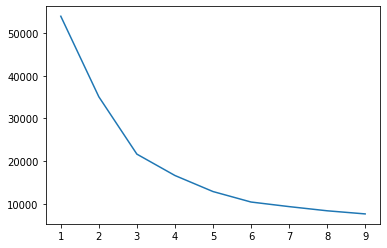

In [96]:
#fig,ax=plt.subplots(figsize=[5,5])
import matplotlib.pyplot as plt 
plt.plot(K,sse)

In [97]:
KM=KMeans(n_clusters=4)
n_clusters=KM.fit_predict(df[['bbox_size_x','bbox_size_y','bbox_size_z','velocity','confidence']])
n_clusters

array([1, 3, 0, ..., 3, 3, 3])

In [98]:
df['kmean_cluster']=n_clusters
df.sort_values(by=['id','timestamp'],ascending=[0,1],inplace=True)
df.head(5)

,timestamp,id,label,confidence,bbox_position_x,bbox_position_y,bbox_size_x,bbox_size_y,bbox_size_z,bbox_yaw,velocity_x,velocity_y,tracking_status,collection,velocity,kmean_cluster
40966,2021-10-08 15:11:58.760,353580,4,0.280000,16.171875,-12.406250,0.7,0.7,1.462240,5.955793,0.000000,0.000000e+00,1,1,0.000000,3
40969,2021-10-08 15:11:58.861,353580,4,0.280000,16.077908,-12.468751,0.7,0.7,1.460927,2.661124,-0.004519,-1.680000e-11,1,1,0.004519,3
40976,2021-10-08 15:11:58.976,353580,2,0.552471,16.077686,-12.468752,0.7,0.7,1.460927,2.661124,-0.004519,0.000000e+00,2,1,0.004519,3
40982,2021-10-08 15:11:59.073,353580,2,0.552471,16.077524,-12.468752,0.7,0.7,1.460927,2.661124,-0.004519,-6.730000e-11,2,1,0.004519,3
40988,2021-10-08 15:11:59.195,353580,2,0.552471,16.077366,-12.468753,0.7,0.7,1.460927,2.661124,-0.004519,-1.850000e-10,2,1,0.004519,3


In [99]:
from sklearn.cluster import MiniBatchKMeans
K=range(1,10)
sse=[]
for i in K:
    mbk=MiniBatchKMeans(n_clusters=i, init='k-means++', max_iter=100, batch_size=1024, verbose=0, 
                               compute_labels=True, 
                               random_state=None, tol=0.0, 
                               max_no_improvement=10, init_size=None, n_init=3, reassignment_ratio=0.01)
    mbk.fit_predict(df[['bbox_size_x','bbox_size_y','bbox_size_z','velocity','confidence']])
    sse.append(mbk.inertia_)

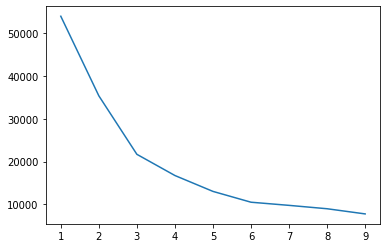

In [100]:
#fig,ax=plt.subplots(figsize=[5,5])
import matplotlib.pyplot as plt 
plt.plot(K,sse)

In [101]:
mbk=MiniBatchKMeans(n_clusters=4, init='k-means++', max_iter=100, batch_size=1024, verbose=0, 
                               compute_labels=True, 
                               random_state=None, tol=0.0, 
                               max_no_improvement=10, init_size=None, n_init=3, reassignment_ratio=0.01)
mini_clusters=mbk.fit_predict(df[['bbox_size_x','bbox_size_y','bbox_size_z','velocity','confidence']])

In [102]:
df['minibatch_cluster']=mini_clusters
df.sort_values(by=['id','timestamp'],ascending=[0,1],inplace=True)
df.head(5)

,timestamp,id,label,confidence,bbox_position_x,bbox_position_y,bbox_size_x,bbox_size_y,bbox_size_z,bbox_yaw,velocity_x,velocity_y,tracking_status,collection,velocity,kmean_cluster,minibatch_cluster
40966,2021-10-08 15:11:58.760,353580,4,0.280000,16.171875,-12.406250,0.7,0.7,1.462240,5.955793,0.000000,0.000000e+00,1,1,0.000000,3,3
40969,2021-10-08 15:11:58.861,353580,4,0.280000,16.077908,-12.468751,0.7,0.7,1.460927,2.661124,-0.004519,-1.680000e-11,1,1,0.004519,3,3
40976,2021-10-08 15:11:58.976,353580,2,0.552471,16.077686,-12.468752,0.7,0.7,1.460927,2.661124,-0.004519,0.000000e+00,2,1,0.004519,3,3
40982,2021-10-08 15:11:59.073,353580,2,0.552471,16.077524,-12.468752,0.7,0.7,1.460927,2.661124,-0.004519,-6.730000e-11,2,1,0.004519,3,3
40988,2021-10-08 15:11:59.195,353580,2,0.552471,16.077366,-12.468753,0.7,0.7,1.460927,2.661124,-0.004519,-1.850000e-10,2,1,0.004519,3,3


In [103]:
from sklearn.cluster import Birch
model = Birch(branching_factor=10, n_clusters=4, threshold=1)
model.fit(df[['bbox_size_x','bbox_size_y','bbox_size_z','velocity','confidence']])
birch_cluster = model.predict(df[['bbox_size_x','bbox_size_y','bbox_size_z','velocity','confidence']])
#plt.scatter(df["id"], df["velocity"], c=pred, cmap='rainbow', alpha=0.5, edgecolors='b')
#plt.show()

In [104]:
df['birch_cluster']=birch_cluster
df.sort_values(by=['id','timestamp'],ascending=[0,1],inplace=True)
df.head(5)

,timestamp,id,label,confidence,bbox_position_x,bbox_position_y,bbox_size_x,bbox_size_y,bbox_size_z,bbox_yaw,velocity_x,velocity_y,tracking_status,collection,velocity,kmean_cluster,minibatch_cluster,birch_cluster
40966,2021-10-08 15:11:58.760,353580,4,0.280000,16.171875,-12.406250,0.7,0.7,1.462240,5.955793,0.000000,0.000000e+00,1,1,0.000000,3,3,3
40969,2021-10-08 15:11:58.861,353580,4,0.280000,16.077908,-12.468751,0.7,0.7,1.460927,2.661124,-0.004519,-1.680000e-11,1,1,0.004519,3,3,3
40976,2021-10-08 15:11:58.976,353580,2,0.552471,16.077686,-12.468752,0.7,0.7,1.460927,2.661124,-0.004519,0.000000e+00,2,1,0.004519,3,3,3
40982,2021-10-08 15:11:59.073,353580,2,0.552471,16.077524,-12.468752,0.7,0.7,1.460927,2.661124,-0.004519,-6.730000e-11,2,1,0.004519,3,3,3
40988,2021-10-08 15:11:59.195,353580,2,0.552471,16.077366,-12.468753,0.7,0.7,1.460927,2.661124,-0.004519,-1.850000e-10,2,1,0.004519,3,3,3


In [105]:
df.groupby('birch_cluster')['birch_cluster'].value_counts()

birch_cluster  birch_cluster
0              0                  933
1              1                  168
2              2                   29
3              3                14003
Name: birch_cluster, dtype: int64

In [106]:
df.groupby('kmean_cluster')['kmean_cluster'].value_counts()

kmean_cluster  kmean_cluster
0              0                6387
1              1                 282
2              2                 879
3              3                7585
Name: kmean_cluster, dtype: int64

In [107]:
df.groupby('minibatch_cluster')['minibatch_cluster'].value_counts()

minibatch_cluster  minibatch_cluster
0                  0                    6308
1                  1                     866
2                  2                     309
3                  3                    7650
Name: minibatch_cluster, dtype: int64

In [108]:
df.to_csv('lidarcollection_filtered_19.csv', index=False)
df.shape

(15133, 18)

In [109]:
id_count = df.groupby('id')['id'].value_counts()
id_count.to_csv('id_count_19.csv')
#id_count.head()

C:\Users\Sruthi Ashraf\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [110]:
#Median velocity, max confident, average confident, count Tracking (3 and 4) percentage may be 
#count Label (1, 2,3)in percentage
#How many detection point we have (count the number of rows for one ID)
#initial and final box, mean position
#start time, end time in the system
mini = df.groupby('id')['timestamp','confidence'].min()
maxi = df.groupby('id')['timestamp','confidence'].max()
minmax = pd.merge(mini,maxi,on ='id')
minmax["duration"] = (minmax.timestamp_y - minmax.timestamp_x)
minmax.to_csv('minmax_19.csv')
#minmax.head()

In [111]:
first = df.groupby('id')['timestamp', 'bbox_position_x', 'bbox_position_y'].first()
first.to_csv('first_19.csv')

last = df.groupby('id')['timestamp', 'bbox_position_x', 'bbox_position_y'].last()
last.to_csv('last_19.csv')
#last.head()

In [112]:
row_for_tracking = df.groupby('id')['tracking_status'].value_counts()
row_for_tracking.to_csv('tracking_count_19.csv')
row_for_labels = df.groupby('id')['label'].value_counts()
row_for_labels.to_csv('label_count_19.csv')
kmean_count = df.groupby('id')['kmean_cluster'].value_counts()
kmean_count.to_csv('kmeancluster_count_19.csv')
minibatch_count = df.groupby('id')['minibatch_cluster'].value_counts()
minibatch_count.to_csv('minibatch_count_19.csv')
birch_count = df.groupby('id')['birch_cluster'].value_counts()
birch_count.to_csv('birch_count_19.csv')

C:\Users\Sruthi Ashraf\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
C:\Users\Sruthi Ashraf\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.
C:\Users\Sruthi Ashraf\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
C:\Users\Sruthi Ashraf\Anaconda3\lib\site-packages\ipykernel_launcher

In [288]:
row_for_tracking=pd.read_csv('tracking_count.csv') 
tracking = row_for_tracking.pivot_table(index=["id"], 
                    columns='tracking', 
                    values='count')
tracking.to_csv('tracking_count2.csv')

In [289]:
row_for_labels=pd.read_csv('label_count.csv') 
label = row_for_labels.pivot_table(index=["id"], 
                    columns='label', 
                    values='count')
label.to_csv('label_count2.csv')

In [291]:
row_for_kmean=pd.read_csv('kmeancluster_count.csv') 
kmeancluster = row_for_kmean.pivot_table(index=["id"], 
                    columns='kmeancluster', 
                    values='count')
kmeancluster.to_csv('kmeancluster_count2.csv')

In [292]:
row_for_minibatch=pd.read_csv('minibatch_count.csv') 
minibatchcluster = row_for_minibatch.pivot_table(index=["id"], 
                    columns='minibatch', 
                    values='count')
minibatchcluster.to_csv('minibatchcluster_count2.csv')

In [294]:
row_for_birch=pd.read_csv('birch_count.csv') 
birchcluster = row_for_birch.pivot_table(index=["id"], 
                    columns='birch', 
                    values='count')
birchcluster.to_csv('birch_count2.csv')

In [164]:
import pandas as pd
import numpy as np 
%cd C:\Users\Sruthi Ashraf\Downloads\AED50_Challenge_Data_23Nov\AED50_Challenge_Data\Competition_Data\Lidar\collection_one
filter1 =pd.read_csv('reqd_values_collection1_filtercriteria.csv')
df1=filter1.copy()
df1.columns = df1.columns.str.lower()
df1.shape

C:\Users\Sruthi Ashraf\Downloads\AED50_Challenge_Data_23Nov\AED50_Challenge_Data\Competition_Data\Lidar\collection_one


(378, 43)

In [165]:
df1.drop(df1[(df1['velocity_mean'] == 0) |(df1['distance'] <= 1)].index, inplace=True)
df1.shape

(143, 43)

In [166]:
df1.drop(df1[(df1['birch_cluster'] == 0)].index, inplace=True)
df1.shape

(134, 43)

In [167]:
direction=[((df1['bbox_position_x_first'] > 0) & (df1['bbox_position_x_last'] > 0) & 
            (df1['bbox_position_x_first'] >  df1['bbox_position_x_last']) &
            (df1['bbox_position_y_first'] >  df1['bbox_position_y_last'])),
           
            ((df1['bbox_position_x_first'] > 0) & (df1['bbox_position_x_last'] > 0) & 
            (df1['bbox_position_x_first'] <  df1['bbox_position_x_last']) &
            (df1['bbox_position_y_first'] <  df1['bbox_position_y_last'])),
           
            ((df1['bbox_position_x_first'] < 0) & (df1['bbox_position_x_last'] < 0) & 
            (df1['bbox_position_x_first'] < df1['bbox_position_x_last']) &
            (df1['bbox_position_y_first'] <  df1['bbox_position_y_last'])),
           
            ((df1['bbox_position_x_first'] < 0) & (df1['bbox_position_x_last'] < 0) & 
            (df1['bbox_position_x_first'] >  df1['bbox_position_x_last']) &
            (df1['bbox_position_y_first'] >  df1['bbox_position_y_last'])),
           
            ((df1['bbox_position_x_first'] > 0) & (df1['bbox_position_x_last'] < 0) & 
            (df1['bbox_position_x_first'] >  df1['bbox_position_x_last']) &
            (df1['bbox_position_y_first'] < 0) & (df1['bbox_position_y_last'] > 0)&
            (df1['bbox_position_y_first'] <  df1['bbox_position_y_last'])),
           
            ((df1['bbox_position_x_first'] < 0) & (df1['bbox_position_x_last'] > 0) & 
            (df1['bbox_position_x_first'] <  df1['bbox_position_x_last']) &
            (df1['bbox_position_y_first'] > 0) & (df1['bbox_position_y_last'] < 0)&
            (df1['bbox_position_y_first'] >  df1['bbox_position_y_last'])),
           
            ((df1['bbox_position_x_first'] > 0) & (df1['bbox_position_x_last'] < 0) & 
            (df1['bbox_position_x_first'] >  df1['bbox_position_x_last']) &
            (df1['bbox_position_y_first'] > 0) & (df1['bbox_position_y_last'] > 0)&
            (df1['bbox_position_y_first'] <  df1['bbox_position_y_last'])),
           
            ((df1['bbox_position_x_first'] < 0) & (df1['bbox_position_x_last'] > 0) & 
            (df1['bbox_position_x_first'] <  df1['bbox_position_x_last']) &
            (df1['bbox_position_y_first'] > 0) & (df1['bbox_position_y_last'] > 0)&
            (df1['bbox_position_y_first'] >  df1['bbox_position_y_last']))]

choices = ["AB", "BA", "CD","DC","BC","CB","AD","DA"]
df1['direction'] =np.select(direction,choices, default = 'err')   

In [168]:
df1.groupby('direction')['direction'].value_counts()

direction  direction
AB         AB            8
AD         AD            5
BA         BA            9
BC         BC            1
CB         CB            4
CD         CD           10
DA         DA            5
DC         DC           14
err        err          78
Name: direction, dtype: int64

In [169]:
from sklearn.cluster import Birch
model = Birch(branching_factor=30, n_clusters=4, threshold=1)
model.fit(df1[['bbox_size_x_mean','bbox_size_y_mean','bbox_size_z_mean','velocity_median']])
birch_cluster = model.predict(df1[['bbox_size_x_mean','bbox_size_y_mean','bbox_size_z_mean','velocity_median']])
#plt.scatter(df["id"], df["velocity"], c=pred, cmap='rainbow', alpha=0.5, edgecolors='b')
#plt.show()

In [170]:
df1['birch_velocity']=birch_cluster
df1.sort_values(by=['id','timestamp_begin'],ascending=[0,1],inplace=True)
df1.head(5)

,id,total_count,kmean_cluster,minibatch_cluster,birch_cluster,confidence_min,confidence_max,timestamp_begin,timestamp_end,duration_seconds,...,minibatch_0,minibatch_1,minibatch_2,minibatch_3,birch_0,birch_1,birch_2,birch_3,direction,birch_velocity
371,353529,31,2.032258,0.387097,2.0,0.450404,0.729192,11:41.1,11:44.9,3.786,...,19.0,12.0,NaN,NaN,NaN,NaN,31.0,NaN,err,3
369,353446,43,3.000000,0.000000,2.0,0.685718,0.794171,11:35.7,11:40.5,4.774,...,43.0,NaN,NaN,NaN,NaN,NaN,43.0,NaN,err,3
366,353389,144,2.770833,0.076389,2.0,0.391231,0.764123,11:26.8,11:43.5,16.619,...,133.0,11.0,NaN,NaN,NaN,NaN,144.0,NaN,err,3
365,353385,14,2.142857,0.285714,2.0,0.552847,0.606558,11:25.9,11:29.2,3.275,...,10.0,4.0,NaN,NaN,NaN,NaN,14.0,NaN,err,3
364,353383,39,2.769231,0.076923,2.0,0.452802,0.753981,11:25.3,11:30.2,4.833,...,36.0,3.0,NaN,NaN,NaN,NaN,39.0,NaN,AB,3


In [171]:
df1.groupby('birch_velocity')['birch_velocity'].value_counts()

birch_velocity  birch_velocity
0               0                   6
1               1                  14
2               2                   1
3               3                 113
Name: birch_velocity, dtype: int64

In [172]:
from sklearn.cluster import Birch
model = Birch(branching_factor=30, n_clusters=4, threshold=1)
model.fit(df1[['bbox_size_x_mean','bbox_size_y_mean','bbox_size_z_mean','speed']])
birch_cluster = model.predict(df1[['bbox_size_x_mean','bbox_size_y_mean','bbox_size_z_mean','speed']])
#plt.scatter(df["id"], df["velocity"], c=pred, cmap='rainbow', alpha=0.5, edgecolors='b')
#plt.show()

In [173]:
df1['birch_speed']=birch_cluster
df1.sort_values(by=['id','timestamp_begin'],ascending=[0,1],inplace=True)
df1.head(5)

,id,total_count,kmean_cluster,minibatch_cluster,birch_cluster,confidence_min,confidence_max,timestamp_begin,timestamp_end,duration_seconds,...,minibatch_1,minibatch_2,minibatch_3,birch_0,birch_1,birch_2,birch_3,direction,birch_velocity,birch_speed
371,353529,31,2.032258,0.387097,2.0,0.450404,0.729192,11:41.1,11:44.9,3.786,...,12.0,NaN,NaN,NaN,NaN,31.0,NaN,err,3,1
369,353446,43,3.000000,0.000000,2.0,0.685718,0.794171,11:35.7,11:40.5,4.774,...,NaN,NaN,NaN,NaN,NaN,43.0,NaN,err,3,1
366,353389,144,2.770833,0.076389,2.0,0.391231,0.764123,11:26.8,11:43.5,16.619,...,11.0,NaN,NaN,NaN,NaN,144.0,NaN,err,3,1
365,353385,14,2.142857,0.285714,2.0,0.552847,0.606558,11:25.9,11:29.2,3.275,...,4.0,NaN,NaN,NaN,NaN,14.0,NaN,err,3,1
364,353383,39,2.769231,0.076923,2.0,0.452802,0.753981,11:25.3,11:30.2,4.833,...,3.0,NaN,NaN,NaN,NaN,39.0,NaN,AB,3,1


In [174]:
df1.groupby('birch_speed')['birch_speed'].value_counts()

birch_speed  birch_speed
0            0                5
1            1              123
2            2                3
3            3                3
Name: birch_speed, dtype: int64

In [175]:
from sklearn.cluster import Birch
model = Birch(branching_factor=30, n_clusters=4, threshold=1)
model.fit(df1[['bbox_size_x_mean','bbox_size_y_mean','bbox_size_z_mean','duration_seconds']])
birch_cluster = model.predict(df1[['bbox_size_x_mean','bbox_size_y_mean','bbox_size_z_mean','duration_seconds']])
#plt.scatter(df["id"], df["velocity"], c=pred, cmap='rainbow', alpha=0.5, edgecolors='b')
#plt.show()

In [176]:
df1['birch_duration']=birch_cluster
df1.sort_values(by=['id','timestamp_begin'],ascending=[0,1],inplace=True)
df1.head(5)

,id,total_count,kmean_cluster,minibatch_cluster,birch_cluster,confidence_min,confidence_max,timestamp_begin,timestamp_end,duration_seconds,...,minibatch_2,minibatch_3,birch_0,birch_1,birch_2,birch_3,direction,birch_velocity,birch_speed,birch_duration
371,353529,31,2.032258,0.387097,2.0,0.450404,0.729192,11:41.1,11:44.9,3.786,...,NaN,NaN,NaN,NaN,31.0,NaN,err,3,1,0
369,353446,43,3.000000,0.000000,2.0,0.685718,0.794171,11:35.7,11:40.5,4.774,...,NaN,NaN,NaN,NaN,43.0,NaN,err,3,1,0
366,353389,144,2.770833,0.076389,2.0,0.391231,0.764123,11:26.8,11:43.5,16.619,...,NaN,NaN,NaN,NaN,144.0,NaN,err,3,1,0
365,353385,14,2.142857,0.285714,2.0,0.552847,0.606558,11:25.9,11:29.2,3.275,...,NaN,NaN,NaN,NaN,14.0,NaN,err,3,1,0
364,353383,39,2.769231,0.076923,2.0,0.452802,0.753981,11:25.3,11:30.2,4.833,...,NaN,NaN,NaN,NaN,39.0,NaN,AB,3,1,0


In [178]:
df1.groupby('birch_duration')['birch_duration'].value_counts()

birch_duration  birch_duration
0               0                 121
1               1                   9
2               2                   1
3               3                   3
Name: birch_duration, dtype: int64

In [177]:
df1.to_csv('collection1_results.csv')